In [1]:
%matplotlib inline
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline

## 封装Matplotlib绘图 

source codes below are from [d2l](https://github.com/d2l-ai/d2l-zh/tree/master/d2l) package 

In [2]:
def use_svg_display():
    """使用svg格式在Jupyter中显示绘图

    Defined in :numref:`sec_calculus`"""
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    """设置matplotlib的图表大小

    Defined in :numref:`sec_calculus`"""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴

    Defined in :numref:`sec_calculus`"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点

    Defined in :numref:`sec_calculus`"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    # 以下代码主要是考虑有x，y的时候实现多线画图
    # 无x的时候，默认x轴多线画图。
    #多线画图，就是要将输入转换为List[List[x]]类型。所以进行了若干分类讨论。
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

## Formal Work Start

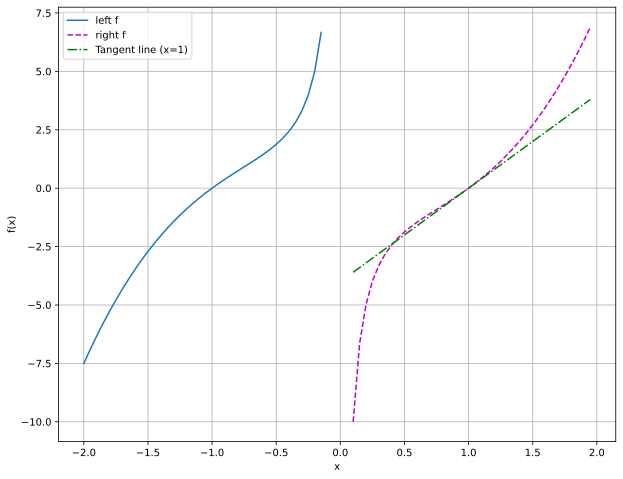

In [6]:
# 2.4.6 T1
def f(x):
    return x**3-1/x


def g(x):
    return 4*x - 4


x_left = np.arange(-2, -0.1, 0.05)
x_right = np.arange(0.1, 2, 0.05)
plot([x_left, x_right, x_right], [f(x_left), f(x_right), g(x_right)], 'x', 'f(x)', figsize=(10, 8),legend=['left f', 'right f' ,'Tangent line (x=1)'])